# Introduction
As the quarantine continues, I’ve picked up a number of hobbies and interests… including WINE. Recently, I’ve acquired a taste for wines, although I don’t really know what makes a good wine. Therefore, I decided to apply some machine learning models to figure out what makes a good quality wine!

I used Kaggle’s Red Wine Quality dataset to build various classification models to predict whether a particular red wine is “good quality” or not. Each wine in this dataset is given a “quality” score between 0 and 10. For the purpose of this project, I converted the output to a binary output where each wine is either “good quality” (a score of 7 or higher) or not (a score below 7). The quality of a wine is determined by 11 input variables:

<ol>
<li>Fixed acidity
<li>Volatile acidity
<li>Citric acid
<li>Residual sugar
<li>Chlorides
<li>Free sulfur dioxide
<li>Total sulfur dioxide
<li>Density
<li>pH
<li>Sulfates
<li>Alcohol
    </ol>

## Objectives
The objectives of this project are as follows:
<ol>
<li>To experiment with different classification methods to see which yields the highest accuracy.
<li>To determine which features are the most indicative of a good quality wine.
    </ol>
    So Let's Start

## Setup
First, I imported all of the relevant libraries that I’ll be using as well as the data itself.
### Importing Libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df=pd.read_csv("red- winequality.csv")

### Understanding Data
Next, I wanted to get a better idea of what I was working with.

In [3]:
# See the number of rows and columns
print("Rows, columns: " + str(df.shape))
# See the first five rows of the dataset
df.head()

Rows, columns: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


There are a total of 1599 rows and 12 columns.

### The info() function:
It is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### The describe() function: 
It computes a summary of statistics pertaining to the DataFrame columns. This function gives the mean, std and IQR values. And, function excludes the character columns and given summary about numeric columns.

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Missing Values


In [6]:
# The data looks very clean by looking at the first five rows, but I still wanted to make sure that there were no missing values.
# Missing Values
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


This is a very beginner-friendly dataset. I did not have to deal with any missing values, and there isn’t much flexibility to conduct some feature engineering given these variables. Next, I wanted to explore my data a little bit more.

In [7]:
# Checking For Unique Values in quality Attribute of the Dataset

df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [8]:
# The value_counts().sort_index() will Provide Number of data With Respect to Each value of attribue in sorted Manner

df.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

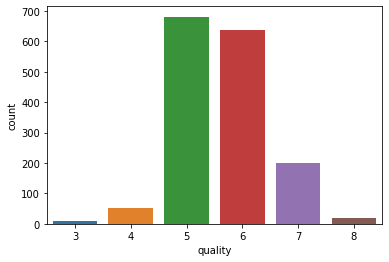

In [10]:
# A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. 
sns.countplot(x='quality',data=df)
# The Below Distribution Shows Quality Range Between (3 to 8 )

### Convert to a Classification Problem
Going back to my objective, I wanted to compare the effectiveness of different classification techniques, so I needed to change the output variable to a binary output.

For this problem, I defined a bottle of wine as ‘good quality’ if it had a quality score of 7 or higher, and if it had a score of less than 7, it was deemed ‘bad quality’.

Once I converted the output variable to a binary output, I separated my feature variables (X) and the target variable (y) into separate dataframes.

In [12]:
# Create Classification version of target variable
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]
# Separate feature variables and target variable
X = df.drop(['quality','goodquality'], axis = 1)
y = df['goodquality']

### Proportion of Good vs Bad Wines
I wanted to make sure that there was a reasonable number of good quality wines. Based on the results below, it seemed like a fair enough number. In some applications, resampling may be required if the data was extremely imbalanced, but I assumed that it was okay for this purpose.

In [13]:
# See proportion of good vs bad wines
df['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

### Correlation Matrix
Next I wanted to see the correlations between the variables that I’m working with. This allows me to get a much better understanding of the relationships between my variables in a quick glimpse.

Immediately, I can see that there are some variables that are strongly correlated to quality. It’s likely that these variables are also the most important features in our machine learning model, but we’ll take a look at that later.

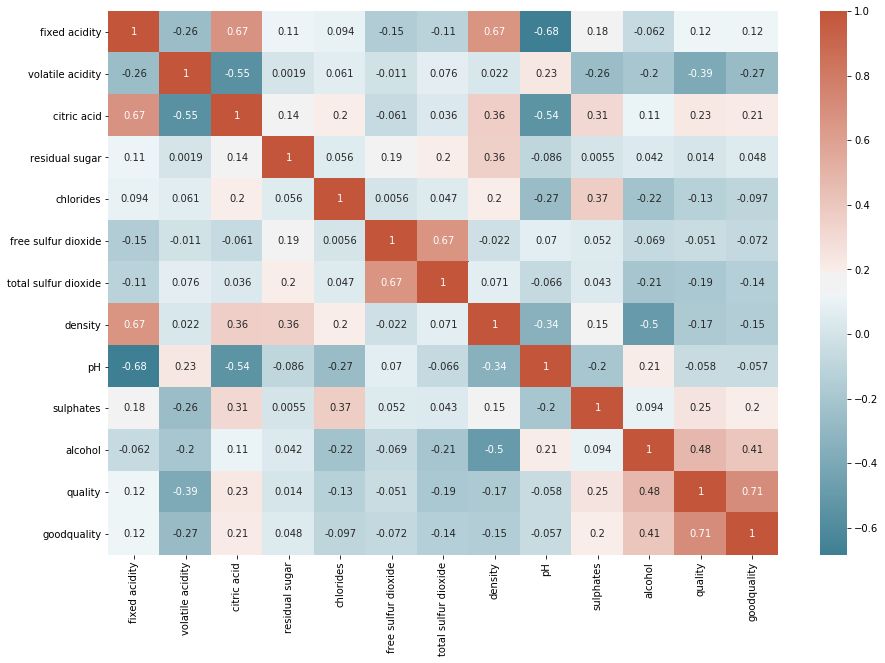

In [19]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

## Preparing Data for Modelling
### Standardizing Feature Variables
At this point, I felt that I was ready to prepare the data for modelling. The first thing that I did was standardize the data. Standardizing the data means that it will transform the data so that its distribution will have a mean of 0 and a standard deviation of 1. It’s important to standardize your data in order to equalize the range of the data.

For example, imagine a dataset with two input features: height in millimeters and weight in pounds. Because the values of ‘height’ are much higher due to its measurement, a greater emphasis will automatically be placed on height than weight, creating a bias.

In [22]:
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

### Split data
Next I split the data into a training and test set so that I could cross-validate my models and determine their effectiveness.

In [24]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

#### Now Comes the Fun Part !

### Modelling
For this project, I wanted to compare five different machine learning models: decision trees, random forests, AdaBoost, Gradient Boost, and XGBoost. For the purpose of this project, I wanted to compare these models by their accuracy.

###  Model 1: Decision Tree
Decision trees are a popular model, used in operations research, strategic planning, and machine learning. Each square above is called a node, and the more nodes you have, the more accurate your decision tree will be (generally). The last nodes of the decision tree, where a decision is made, are called the leaves of the tree. Decision trees are intuitive and easy to build but fall short when it comes to accuracy.

In [25]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       355
           1       0.53      0.73      0.62        45

    accuracy                           0.90       400
   macro avg       0.75      0.83      0.78       400
weighted avg       0.92      0.90      0.90       400



### Model 2: Random Forest
Random forests are an ensemble learning technique that builds off of decision trees. Random forests involve creating multiple decision trees using bootstrapped datasets of the original data and randomly selecting a subset of variables at each step of the decision tree. The model then selects the mode of all of the predictions of each decision tree. What’s the point of this? By relying on a “majority wins” model, it reduces the risk of error from an individual tree.

For example, if we created one decision tree, the third one, it would predict 0. But if we relied on the mode of all 4 decision trees, the predicted value would be 1. This is the power of random forests.

In [26]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       355
           1       0.68      0.58      0.63        45

    accuracy                           0.92       400
   macro avg       0.82      0.77      0.79       400
weighted avg       0.92      0.92      0.92       400



### Model 3: AdaBoost
The next three models are boosting algorithms that take weak learners and turn them into strong ones. I don’t want to get sidetracked and explain the differences between the three because it’s quite complicated and intricate. That being said, I’ll leave some resources where you can learn about AdaBoost, Gradient Boosting, and XGBoosting.
<ul>
<li>StatQuest: AdaBoost
<li>StatQuest: Gradient Boost
<li>StatQuest: XGBoost
    </ul>

In [27]:
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier(random_state=1)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       355
           1       0.51      0.49      0.50        45

    accuracy                           0.89       400
   macro avg       0.72      0.71      0.72       400
weighted avg       0.89      0.89      0.89       400



### Model 4: Gradient Boosting


In [29]:
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier(random_state=1)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       355
           1       0.52      0.51      0.52        45

    accuracy                           0.89       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.89      0.89      0.89       400



### Model 5: XGBoost


In [36]:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1)
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       355
           1       0.62      0.69      0.65        45

    accuracy                           0.92       400
   macro avg       0.79      0.82      0.80       400
weighted avg       0.92      0.92      0.92       400



By comparing the five models, the random forest and XGBoost seems to yield the highest level of accuracy. However, since XGBoost has a better f1-score for predicting good quality wines (1), I’m concluding that the XGBoost is the winner of the five models.
## Feature Importance

Below, I graphed the feature importance based on the Random Forest model and the XGBoost model. While they slightly vary, the top 3 features are the same: alcohol, volatile acidity, and sulphates. If you look below the graphs, I split the dataset into good quality and bad quality to compare these variables in more detail.

### Random Forest


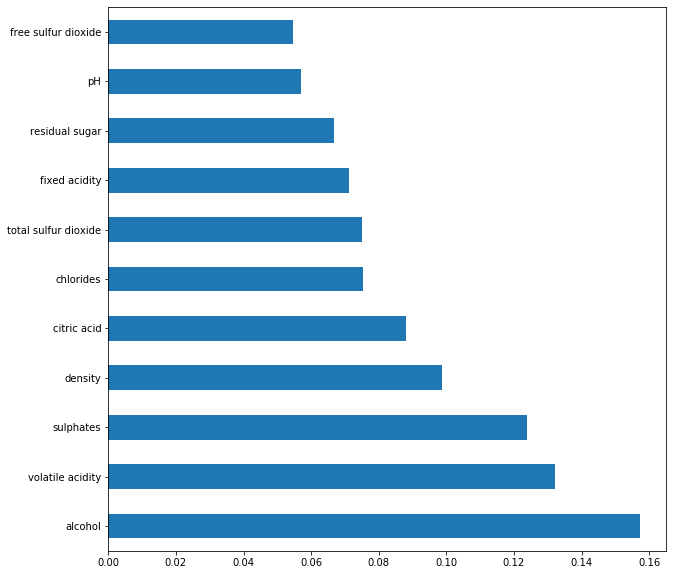

In [34]:
feat_importances = pd.Series(model2.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

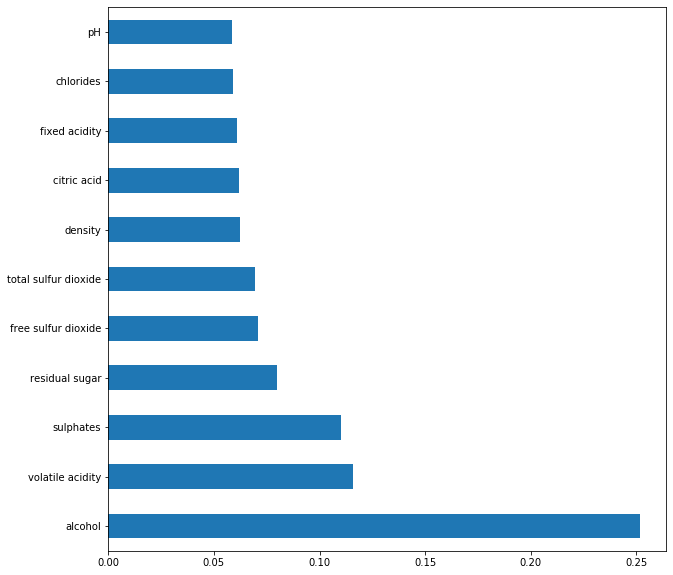

In [37]:
feat_importances = pd.Series(model5.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

# Comparing the Top 4 Features

### Good Quality

In [40]:
# Filtering df for only good quality
df_temp = df[df['goodquality']==1]
df_temp.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.0
mean,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949,1.0
std,1.999977,0.144963,0.194438,1.363026,0.028480,10.234615,32.572238,0.002201,0.154478,0.134038,0.998153,0.276443,0.0
min,4.900000,0.120000,0.000000,1.200000,0.012000,3.000000,7.000000,0.990640,2.880000,0.390000,9.200000,7.000000,1.0
25%,7.400000,0.300000,0.300000,2.000000,0.062000,6.000000,17.000000,0.994700,3.200000,0.650000,10.800000,7.000000,1.0
50%,8.700000,0.370000,0.400000,2.300000,0.073000,11.000000,27.000000,0.995720,3.270000,0.740000,11.600000,7.000000,1.0
75%,10.100000,0.490000,0.490000,2.700000,0.085000,18.000000,43.000000,0.997350,3.380000,0.820000,12.200000,7.000000,1.0
max,15.600000,0.915000,0.760000,8.900000,0.358000,54.000000,289.000000,1.003200,3.780000,1.360000,14.000000,8.000000,1.0


### Bad Quality

In [39]:
# Filtering df for only bad quality
df_temp2 = df[df['goodquality']==0]
df_temp2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.0
mean,8.236831,0.547022,0.254407,2.512120,0.089281,16.172214,48.285818,0.996859,3.314616,0.644754,10.251037,5.408828,0.0
std,1.682726,0.176337,0.189665,1.415778,0.049113,10.467685,32.585604,0.001808,0.154135,0.170629,0.969664,0.601719,0.0
min,4.600000,0.160000,0.000000,0.900000,0.034000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.0
25%,7.100000,0.420000,0.082500,1.900000,0.071000,8.000000,23.000000,0.995785,3.210000,0.540000,9.500000,5.000000,0.0
50%,7.800000,0.540000,0.240000,2.200000,0.080000,14.000000,39.500000,0.996800,3.310000,0.600000,10.000000,5.000000,0.0
75%,9.100000,0.650000,0.400000,2.600000,0.091000,22.000000,65.000000,0.997900,3.410000,0.700000,10.900000,6.000000,0.0
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,165.000000,1.003690,4.010000,2.000000,14.900000,6.000000,0.0


By looking into the details, we can see that good quality wines have higher levels of alcohol on average, have a lower volatile acidity on average, higher levels of sulphates on average, and higher levels of residual sugar on average.